In [2]:
# A lot of EDA is influenced by 

# https://www.kaggle.com/arjunsehajpal/m5-forecasting-initialeda
# https://www.kaggle.com/suoires1/walmart-sale-overly-simplified-eda
# https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [3]:
cd C:\Users\malkabir\OneDrive - University of New Mexico\All Personal Project\2020 M5 Forecasting Everything

C:\Users\malkabir\OneDrive - University of New Mexico\All Personal Project\2020 M5 Forecasting Everything


In [4]:
#standard
import pandas as pd, numpy as np
from numpy.random import randn

#stat

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

#plotting

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

%matplotlib inline

# 01. Data Processing and simplified EDA to understand the data

## 01.01. Calender or event data

In [5]:
#read raw data
calendar=pd.read_csv("RawData/calendar.csv")
calendar.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [6]:
calendar.shape

(1969, 14)

### <font color=red>Obs-1: what are the different event</font>

In [7]:
display(calendar['event_name_1'].value_counts())
display(calendar['event_name_2'].value_counts())

NBAFinalsStart         6
MemorialDay            6
SuperBowl              6
LentWeek2              6
ValentinesDay          6
LentStart              6
PresidentsDay          6
Purim End              6
Ramadan starts         6
Mother's day           6
StPatricksDay          6
NBAFinalsEnd           6
Pesach End             6
VeteransDay            5
Eid al-Fitr            5
Halloween              5
NewYear                5
Thanksgiving           5
IndependenceDay        5
MartinLutherKingDay    5
ColumbusDay            5
Cinco De Mayo          5
EidAlAdha              5
OrthodoxChristmas      5
Chanukah End           5
Easter                 5
Christmas              5
LaborDay               5
OrthodoxEaster         5
Father's day           4
Name: event_name_1, dtype: int64

Father's day      2
Easter            1
OrthodoxEaster    1
Cinco De Mayo     1
Name: event_name_2, dtype: int64

>>__So usual govt holiday, Nothing walmart special__

### <font color=red>Obs-2: Sell Price and Events</font>

In [9]:
calendar = calendar.fillna("NormalDay") #filling na with normal day
calendar.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NormalDay,NormalDay,NormalDay,NormalDay,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NormalDay,NormalDay,NormalDay,NormalDay,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NormalDay,NormalDay,NormalDay,NormalDay,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NormalDay,NormalDay,NormalDay,NormalDay,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NormalDay,NormalDay,NormalDay,NormalDay,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NormalDay,NormalDay,NormalDay,NormalDay,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NormalDay,NormalDay,NormalDay,NormalDay,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NormalDay,NormalDay,NormalDay,NormalDay,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NormalDay,NormalDay,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NormalDay,NormalDay,NormalDay,NormalDay,1,1,0


In [10]:
#Pricing is set weekly, while events are daily. We will need to pass the daily event info to the corresponding weeks.

events_weekly = calendar[calendar['event_type_1'] != 'NormalDay'][['wm_yr_wk', 'event_name_1', 'event_type_1']] # look at which is not normalday
display(events_weekly.head())
print("Number of week duplicates:", events_weekly['wm_yr_wk'].duplicated().sum())

,wm_yr_wk,event_name_1,event_type_1
8,11102,SuperBowl,Sporting
16,11103,ValentinesDay,Cultural
23,11104,PresidentsDay,National
39,11106,LentStart,Religious
46,11107,LentWeek2,Religious


Number of week duplicates: 27


>>>__Some weeks may contain more than 1 event. This may become important later on (multiple events might affect sale number), but to make my life easier, We will remove the duplicates, keeping at 1 event/week.__

In [11]:
events_weekly = events_weekly.drop_duplicates(subset = 'wm_yr_wk', keep = 'first')

In [12]:
#read Raw sell_prices data

sell_prices=pd.read_csv("RawData/sell_prices.csv")
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [13]:
# create another column from store_id to see different state
sell_prices['state'] =  sell_prices['store_id'].str.split('_').str[0]
# create another column from item_id to see different product cat
sell_prices['product_cat'] =  sell_prices['item_id'].str.split('_').str[0]
#just to see unique product catagory
sell_prices['product_cat'].unique().tolist()

['HOBBIES', 'HOUSEHOLD', 'FOODS']

In [14]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price,state,product_cat
0,CA_1,HOBBIES_1_001,11325,9.58,CA,HOBBIES
1,CA_1,HOBBIES_1_001,11326,9.58,CA,HOBBIES
2,CA_1,HOBBIES_1_001,11327,8.26,CA,HOBBIES
3,CA_1,HOBBIES_1_001,11328,8.26,CA,HOBBIES
4,CA_1,HOBBIES_1_001,11329,8.26,CA,HOBBIES


In [15]:
print(sell_prices.shape,events_weekly.shape)

(6841121, 6) (135, 3)


In [16]:
# merge + fill NaNs
price_with_event = pd.merge(sell_prices, events_weekly, how = 'left', on = ['wm_yr_wk']).fillna('NormalDay')
price_with_event.head()

,store_id,item_id,wm_yr_wk,sell_price,state,product_cat,event_name_1,event_type_1
0,CA_1,HOBBIES_1_001,11325,9.58,CA,HOBBIES,NormalDay,NormalDay
1,CA_1,HOBBIES_1_001,11326,9.58,CA,HOBBIES,NormalDay,NormalDay
2,CA_1,HOBBIES_1_001,11327,8.26,CA,HOBBIES,NormalDay,NormalDay
3,CA_1,HOBBIES_1_001,11328,8.26,CA,HOBBIES,Eid al-Fitr,Religious
4,CA_1,HOBBIES_1_001,11329,8.26,CA,HOBBIES,NormalDay,NormalDay


In [14]:
# new column denotes event where 'event_type_1'
price_with_event['event'] = np.where(price_with_event['event_type_1'] == 'NormalDay', 'NormalDay', 'Event') # if event_type_1 equal to Normal day then it will kepp as normal day, otherwise add event
price_with_event.head()

,store_id,item_id,wm_yr_wk,sell_price,state,product_cat,event_name_1,event_type_1,event
0,CA_1,HOBBIES_1_001,11325,9.58,CA,HOBBIES,NormalDay,NormalDay,NormalDay
1,CA_1,HOBBIES_1_001,11326,9.58,CA,HOBBIES,NormalDay,NormalDay,NormalDay
2,CA_1,HOBBIES_1_001,11327,8.26,CA,HOBBIES,NormalDay,NormalDay,NormalDay
3,CA_1,HOBBIES_1_001,11328,8.26,CA,HOBBIES,Eid al-Fitr,Religious,Event
4,CA_1,HOBBIES_1_001,11329,8.26,CA,HOBBIES,NormalDay,NormalDay,NormalDay


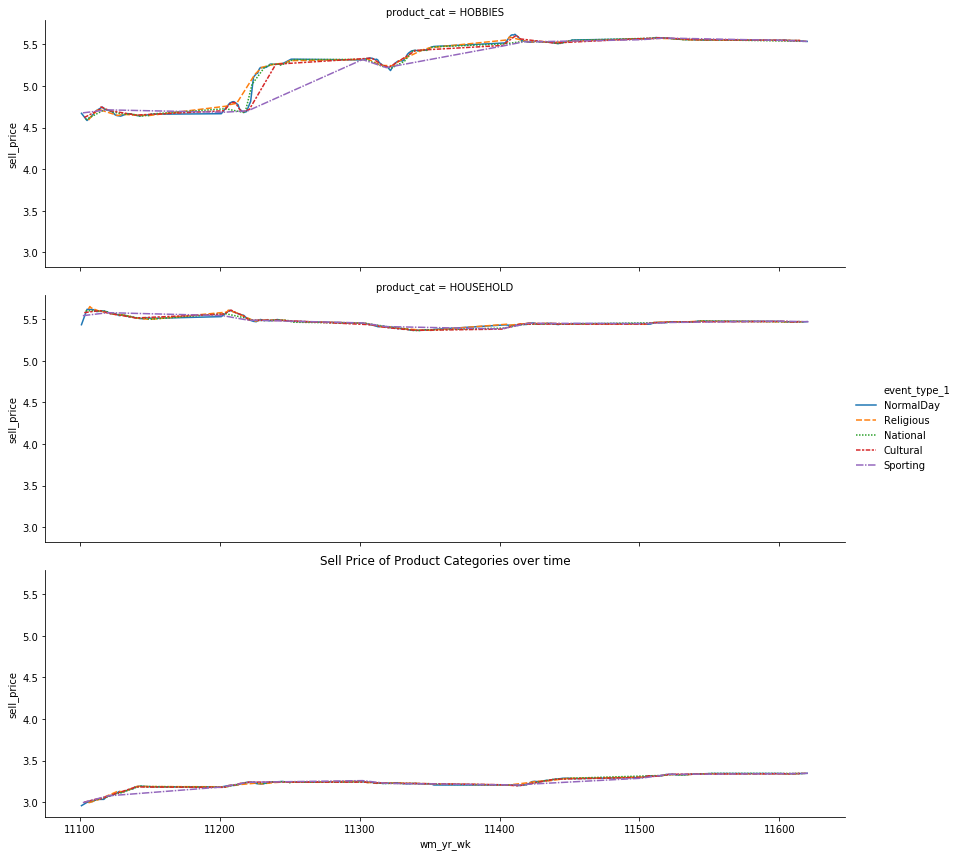

In [15]:
plt.rcParams["figure.figsize"]=27,16

sns.relplot(x = 'wm_yr_wk', y = 'sell_price', 
            hue = 'event_type_1', style = 'event_type_1', row = 'product_cat', 
            height = 4, # make the plot 4 units high
            aspect = 3, # height should be three times width
            kind = 'line',data = price_with_event, ci = None)  # remove confident interval for better clarity

plt.title("Sell Price of Product Categories over time")
plt.show()

>>__wait before summarizing__

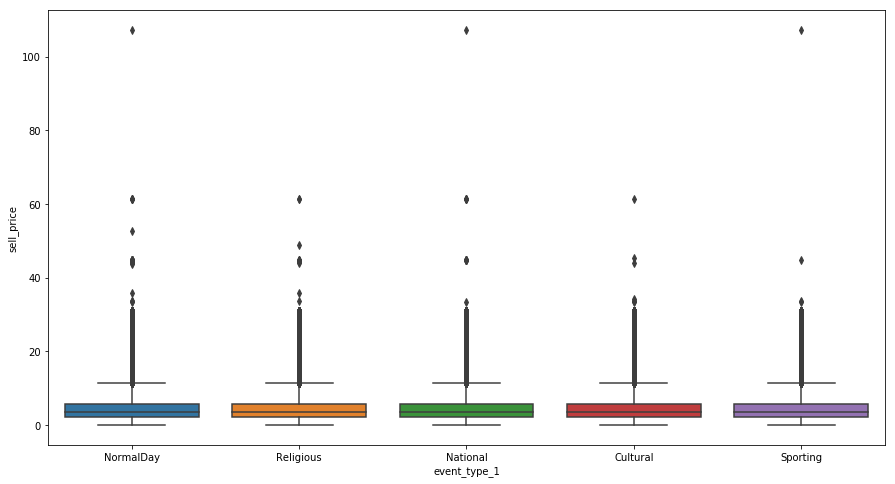

In [16]:

plt.rcParams["figure.figsize"]=15,8
sns.boxplot(x = 'event_type_1', y = 'sell_price', data = price_with_event)
plt.show()

>>__Boxplot also confirms that events don't directly influence the sell price.__

>>> Let try from a different perspectives by calculating the price difference between normal days and event days:

In [17]:
temp_df = price_with_event.groupby(['item_id', 'event'])['sell_price'].min().unstack()
temp_df.head()

event,Event,NormalDay
item_id,,
FOODS_1_001,0.99,1.00
FOODS_1_002,7.88,7.66
FOODS_1_003,2.50,2.88
FOODS_1_004,1.50,1.50
FOODS_1_005,0.10,2.37


In [18]:
temp_df['event_delta'] = temp_df['Event'] - temp_df['NormalDay']
temp_df.head()

event,Event,NormalDay,event_delta
item_id,,,
FOODS_1_001,0.99,1.00,-0.01
FOODS_1_002,7.88,7.66,0.22
FOODS_1_003,2.50,2.88,-0.38
FOODS_1_004,1.50,1.50,0.00
FOODS_1_005,0.10,2.37,-2.27


In [19]:
# What is the proportion of items would go on discount during events?
sum(temp_df['event_delta'] < 0) / len(temp_df)

0.19776976057723844

In [20]:
#from a glance, most price decrease is pretty small compared to the total cost of the item (cents to dollars). Therefore, we need to calculate the proportion of the discount relative to the price of the item:

temp_df['discount_prop'] = temp_df['event_delta'] / temp_df['NormalDay']
temp_df.head()

event,Event,NormalDay,event_delta,discount_prop
item_id,,,,
FOODS_1_001,0.99,1.00,-0.01,-0.010000
FOODS_1_002,7.88,7.66,0.22,0.028721
FOODS_1_003,2.50,2.88,-0.38,-0.131944
FOODS_1_004,1.50,1.50,0.00,0.000000
FOODS_1_005,0.10,2.37,-2.27,-0.957806


In [21]:
temp_df.sort_values(by=['discount_prop']).head(10)

event,Event,NormalDay,event_delta,discount_prop
item_id,,,,
FOODS_3_413,0.01,0.77,-0.76,-0.987013
HOUSEHOLD_2_182,0.05,3.50,-3.45,-0.985714
FOODS_1_005,0.10,2.37,-2.27,-0.957806
FOODS_2_281,0.33,5.97,-5.64,-0.944724
FOODS_1_065,0.10,1.19,-1.09,-0.915966
FOODS_3_020,0.05,0.50,-0.45,-0.900000
FOODS_3_603,0.10,1.00,-0.90,-0.900000
HOUSEHOLD_1_311,0.27,2.47,-2.20,-0.890688
HOUSEHOLD_1_174,0.55,4.87,-4.32,-0.887064


In [22]:
# We can slice the item_id string to get the product department. Let's check which department would offer most discounted items during events:

# reset the index to get the column item_id back
temp_df.reset_index(inplace = True)

# get item department from item_id
temp_df['department'] = temp_df['item_id'].str.split('_').str[:2].apply(lambda x: '_'.join(x))
temp_df.head()

event,item_id,Event,NormalDay,event_delta,discount_prop,department
0,FOODS_1_001,0.99,1.00,-0.01,-0.010000,FOODS_1
1,FOODS_1_002,7.88,7.66,0.22,0.028721,FOODS_1
2,FOODS_1_003,2.50,2.88,-0.38,-0.131944,FOODS_1
3,FOODS_1_004,1.50,1.50,0.00,0.000000,FOODS_1
4,FOODS_1_005,0.10,2.37,-2.27,-0.957806,FOODS_1


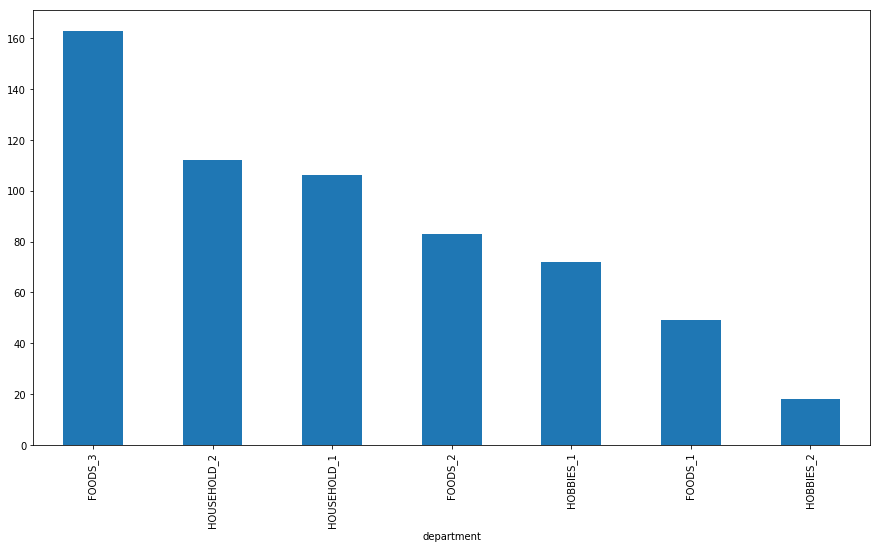

In [23]:
temp_df[temp_df['discount_prop'] < 0].groupby(['department'])['discount_prop'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

## 01.02. Sales_train_validation data

In [17]:
#Read sales_train_validation raw data

sales_train_validation=pd.read_csv("RawData/sales_train_validation.csv")
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [18]:
sales_train_validation.shape

(30490, 1919)

In [19]:
sales_long = pd.melt(sales_train_validation, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'd', value_name = 'unit_sold')
sales_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sold
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [20]:
sales_long.shape # 30490 (rows) *1913 (columns)

(58327370, 8)

In [35]:
sales_cat = sales_long.groupby(['d', 'cat_id'])['unit_sold'].sum().unstack()
sales_cat.head() # dont worry row is not sorted by d , ok

cat_id,FOODS,HOBBIES,HOUSEHOLD
d,,,
d_1,23178,3764,5689
d_10,18901,2615,4056
d_100,16383,2880,4425
d_1000,19276,3235,6749
d_1001,22628,3476,7773


In [30]:
sales_cat = sales_long.groupby(['d', 'cat_id'])['unit_sold'].sum().reset_index()
sales_cat.sort_values("d", inplace=True)
sales_cat.head()

,d,cat_id,unit_sold
0,d_1,FOODS,23178
1,d_1,HOBBIES,3764
2,d_1,HOUSEHOLD,5689
3,d_10,FOODS,18901
4,d_10,HOBBIES,2615


In [36]:
#include the date
# reset index
sales_cat.reset_index(inplace = True)

# melt the cat
sales_cat = pd.melt(sales_cat, id_vars =['d'], var_name = 'product_cat', value_name = 'unit_sold')

# merge with calendar to get datetime
sales_cat = pd.merge(sales_cat, calendar[['date', 'd']], how = 'left', on = 'd')

sales_cat.head()


,d,product_cat,unit_sold,date
0,d_1,FOODS,23178,2011-01-29
1,d_10,FOODS,18901,2011-02-07
2,d_100,FOODS,16383,2011-05-08
3,d_1000,FOODS,19276,2013-10-24
4,d_1001,FOODS,22628,2013-10-25


In [39]:
sales_cat.sort_values('date',inplace=True)
sales_cat.head()

,d,product_cat,unit_sold,date
0,d_1,FOODS,23178,2011-01-29
3826,d_1,HOUSEHOLD,5689,2011-01-29
1913,d_1,HOBBIES,3764,2011-01-29
1025,d_2,FOODS,22758,2011-01-30
4851,d_2,HOUSEHOLD,5634,2011-01-30


In [40]:
sales_cat.shape # 1913*3

(5739, 4)

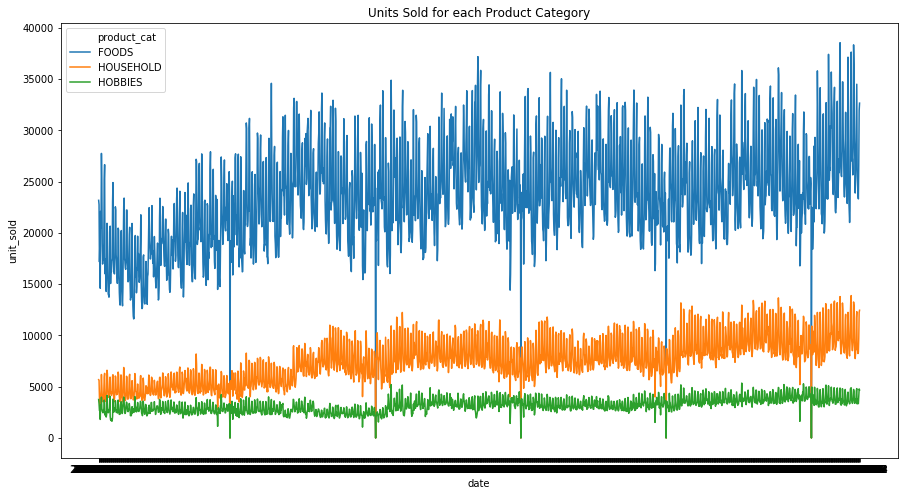

In [41]:
plt.rcParams["figure.figsize"]=15,8

sns.lineplot(x = 'date', y = 'unit_sold', hue = 'product_cat', data = sales_cat)
plt.title("Units Sold for each Product Category")
plt.show()

In [32]:
sales_cat[sales_cat['unit_sold'] < 500]

,d,product_cat,unit_sold,date
71,d_1062,FOODS,20,2013-12-25
476,d_1427,FOODS,20,2014-12-25
881,d_1792,FOODS,13,2015-12-25
1172,d_331,FOODS,13,2011-12-25
1577,d_697,FOODS,11,2012-12-25
1984,d_1062,HOBBIES,0,2013-12-25
2389,d_1427,HOBBIES,0,2014-12-25
2794,d_1792,HOBBIES,0,2015-12-25
3085,d_331,HOBBIES,0,2011-12-25
3490,d_697,HOBBIES,0,2012-12-25


## Time series analysis

In [42]:
sales_univariate = sales_long.groupby(['d'])['unit_sold'].sum().reset_index()

# merge with calendar to get datetime
sales_univariate = pd.merge(sales_univariate, calendar[['date', 'd', 'weekday', 'month', 'year']], how = 'left', on = 'd')

sales_univariate.head()

,d,unit_sold,date,weekday,month,year
0,d_1,32631,2011-01-29,Saturday,1,2011
1,d_10,25572,2011-02-07,Monday,2,2011
2,d_100,23688,2011-05-08,Sunday,5,2011
3,d_1000,29260,2013-10-24,Thursday,10,2013
4,d_1001,33877,2013-10-25,Friday,10,2013


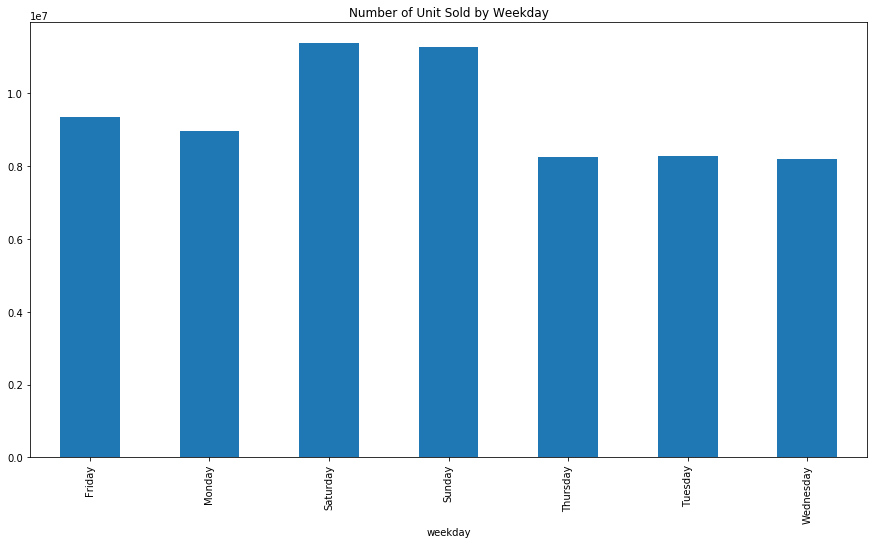

In [43]:
sales_univariate.groupby(['weekday'])['unit_sold'].sum().plot(kind = 'bar')
plt.title("Number of Unit Sold by Weekday")
plt.show()

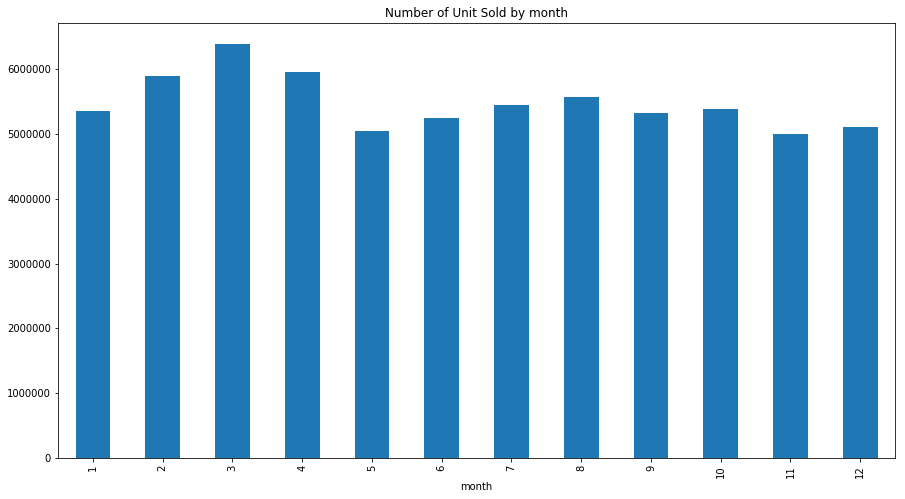

In [44]:
sales_univariate.groupby(['month'])['unit_sold'].sum().plot(kind = 'bar')
plt.title("Number of Unit Sold by month")
plt.show()

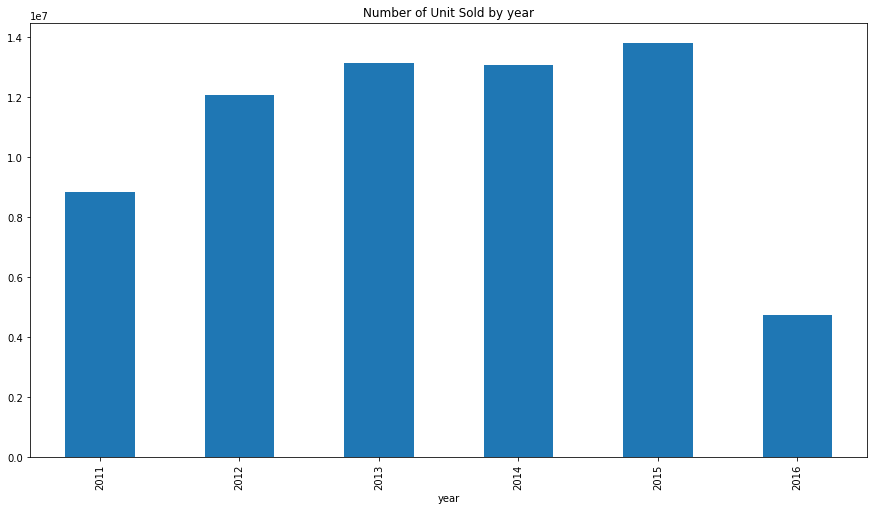

In [45]:
sales_univariate.groupby(['year'])['unit_sold'].sum().plot(kind = 'bar')
plt.title("Number of Unit Sold by year")
plt.show()

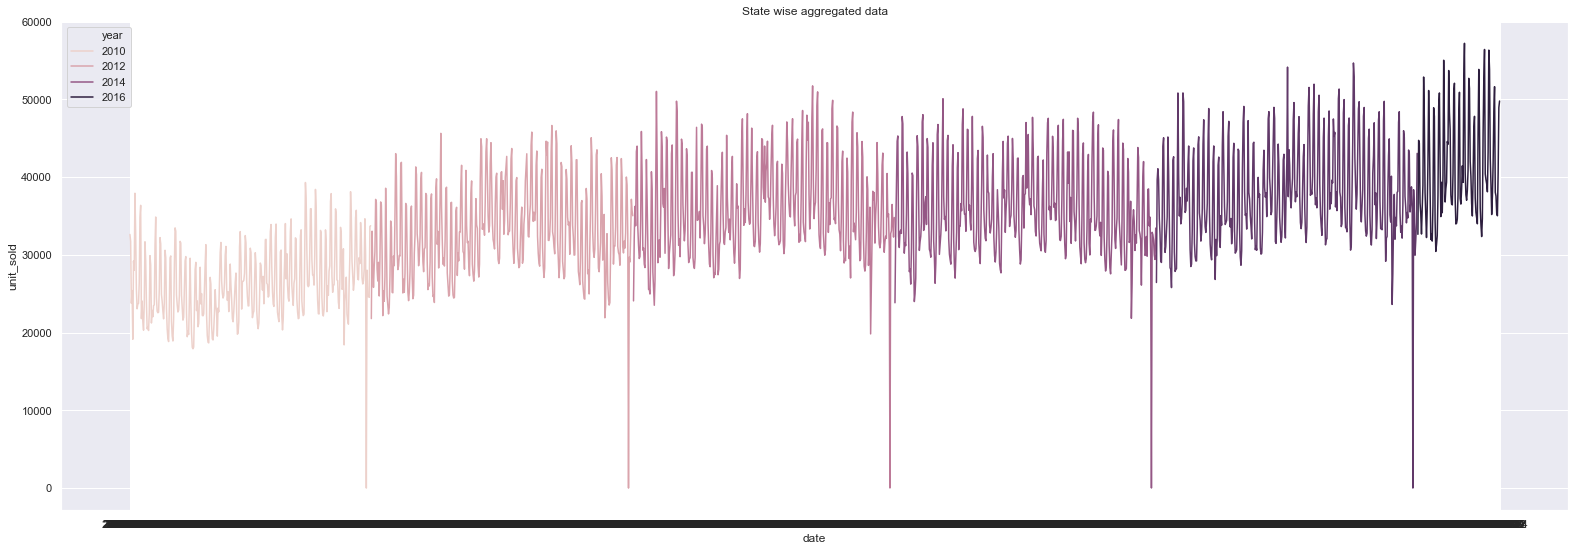

In [76]:
sns.lineplot(x = "date", y = "unit_sold", hue = "year", data = sales_univariate)
plt.title("State wise aggregated data")
plt.show()

## 01.03. Sell_ Prices data

In [46]:
sell_prices.head(2)

,store_id,item_id,wm_yr_wk,sell_price,state,product_cat
0,CA_1,HOBBIES_1_001,11325,9.58,CA,HOBBIES
1,CA_1,HOBBIES_1_001,11326,9.58,CA,HOBBIES


### <font color=red>Obs-1: Do location affects the sale of different categories? (Consumer behavior: Location - Product)</font>

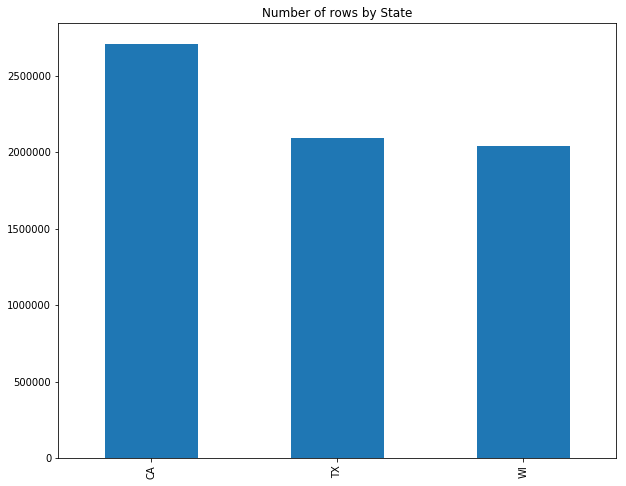

In [46]:
plt.rcParams["figure.figsize"]=10,8
sell_prices['state'].value_counts().plot(kind = 'bar')
plt.title('Number of rows by State')
plt.show()

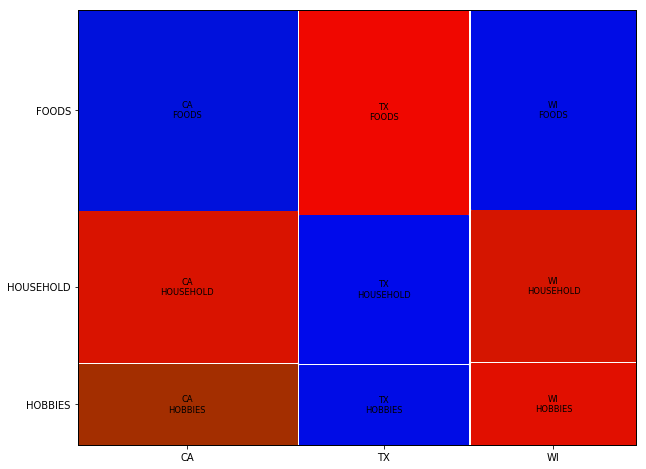

In [47]:
plt.rcParams["figure.figsize"]=10,8
mosaic(sell_prices,['state','product_cat'],statistic=True)
plt.show()

### <font color=red>Obs-2: Does item pricing fluctuate with time (weekly) - Grouped by product categories?</font>

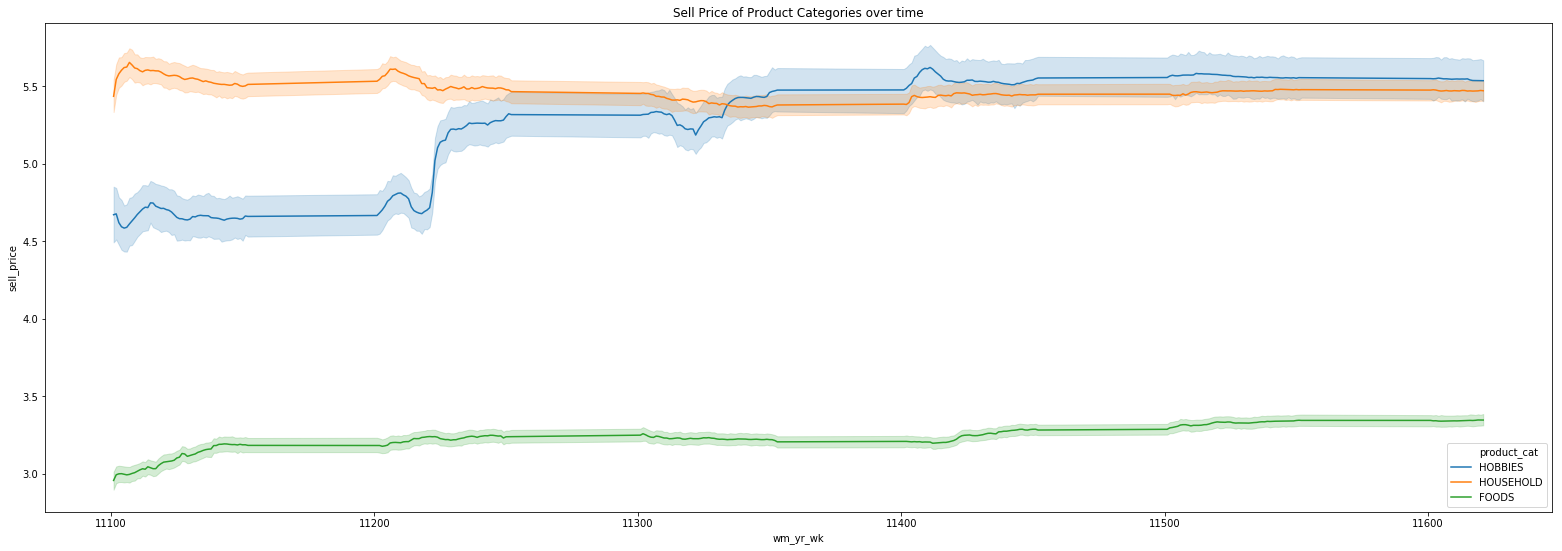

In [48]:
plt.rcParams["figure.figsize"]=27,9
sns.lineplot(x = 'wm_yr_wk', y = 'sell_price', hue = 'product_cat', data = sell_prices)
plt.title("Sell Price of Product Categories over time")
plt.show()

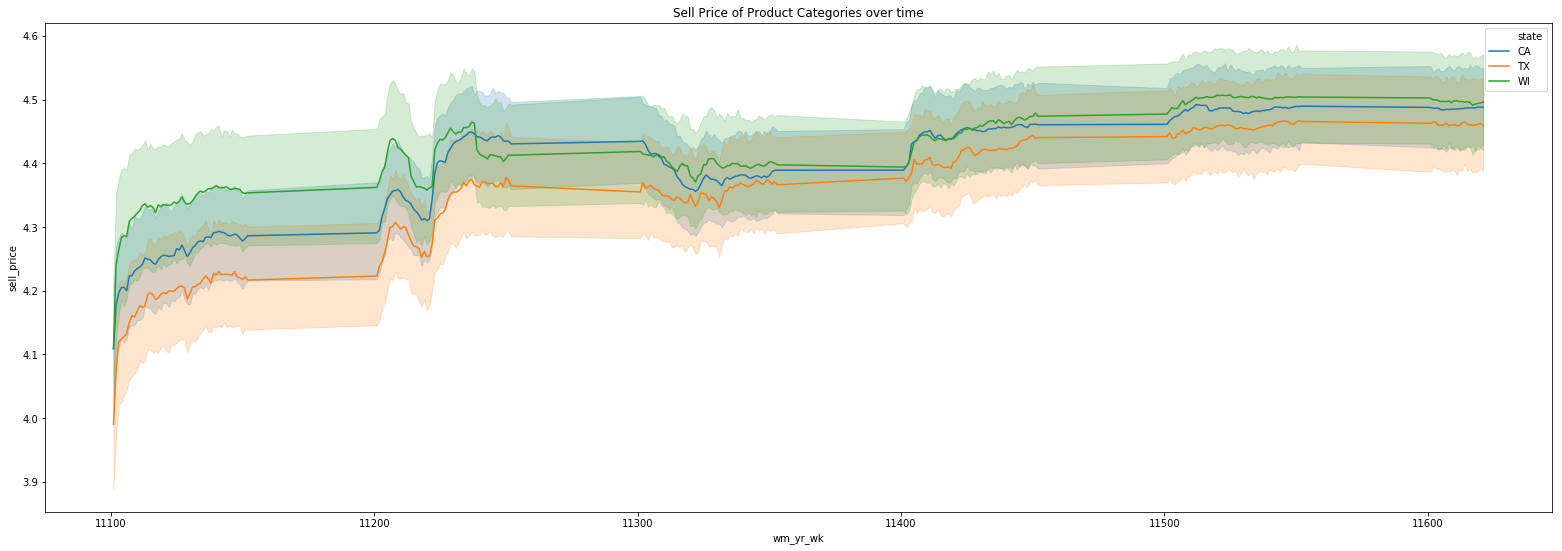

In [49]:
#by-State
plt.rcParams["figure.figsize"]=27,9
sns.lineplot(x = 'wm_yr_wk', y = 'sell_price', hue = 'state', data = sell_prices)
plt.title("Sell Price of Product Categories over time")
plt.show()

## Let merge and prepare a timeseries data

In [49]:
sell=sell_prices.copy()
cal=calendar.copy()
stv=sales_train_validation.copy()

In [50]:
#concatenate item_id and store_id of sell_prices to match with validation table column name 

sell['SELL_PRICES_ID'] = sell['item_id'].str.cat(sell['store_id'],sep="_")
sell.head()

,store_id,item_id,wm_yr_wk,sell_price,state,product_cat,SELL_PRICES_ID
0,CA_1,HOBBIES_1_001,11325,9.58,CA,HOBBIES,HOBBIES_1_001_CA_1
1,CA_1,HOBBIES_1_001,11326,9.58,CA,HOBBIES,HOBBIES_1_001_CA_1
2,CA_1,HOBBIES_1_001,11327,8.26,CA,HOBBIES,HOBBIES_1_001_CA_1
3,CA_1,HOBBIES_1_001,11328,8.26,CA,HOBBIES,HOBBIES_1_001_CA_1
4,CA_1,HOBBIES_1_001,11329,8.26,CA,HOBBIES,HOBBIES_1_001_CA_1


In [51]:
sell.shape

(6841121, 7)

In [52]:
#make the data long to wide, in other word pivot
sell=sell.pivot(index='wm_yr_wk', columns='SELL_PRICES_ID', values='sell_price').reset_index()
sell.head()

SELL_PRICES_ID,wm_yr_wk,FOODS_1_001_CA_1,FOODS_1_001_CA_2,FOODS_1_001_CA_3,FOODS_1_001_CA_4,FOODS_1_001_TX_1,FOODS_1_001_TX_2,FOODS_1_001_TX_3,FOODS_1_001_WI_1,FOODS_1_001_WI_2,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,11101,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,11102,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2,11103,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94
3,11104,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94
4,11105,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94


In [53]:
sell.shape

(282, 30491)

In [54]:
stv=stv.drop(['item_id','dept_id','cat_id','store_id','state_id'],axis=1)
stv.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [55]:
#transpose the day column to row and items (i.e.HOBBIES_1_001_CA_1_validation) to columns to make a timeseries looks data

stv_T=stv.T
stv_T.columns = stv_T.iloc[0]
stv_T = stv_T[1:]
stv_T.head()

id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [56]:
stv_T.shape

(1913, 30490)

In [57]:
#reset the index to add as a column

stv_T.reset_index(inplace=True)
stv_T.head()

id,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
0,d_1,0,0,0,0,0,0,0,12,2,...,0,14,1,0,4,0,0,0,0,0
1,d_2,0,0,0,0,0,0,0,15,0,...,0,11,1,0,4,0,0,6,0,0
2,d_3,0,0,0,0,0,0,0,0,7,...,0,5,1,0,2,2,0,0,0,0
3,d_4,0,0,0,0,0,0,0,0,3,...,0,6,1,0,5,2,0,2,0,0
4,d_5,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [58]:
cal.head(2)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NormalDay,NormalDay,NormalDay,NormalDay,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NormalDay,NormalDay,NormalDay,NormalDay,0,0,0


In [59]:
#rename d column to index
cal=cal.rename(columns={'d':'index'})

In [60]:
#Merge with sales_train_validation with calender data

stv_T_merge=pd.merge(stv_T,cal,on=['index'],how='left')
stv_T_merge.head()

,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,0,0,0,0,0,0,0,12,2,...,1,1,2011,NormalDay,NormalDay,NormalDay,NormalDay,0,0,0
1,d_2,0,0,0,0,0,0,0,15,0,...,2,1,2011,NormalDay,NormalDay,NormalDay,NormalDay,0,0,0
2,d_3,0,0,0,0,0,0,0,0,7,...,3,1,2011,NormalDay,NormalDay,NormalDay,NormalDay,0,0,0
3,d_4,0,0,0,0,0,0,0,0,3,...,4,2,2011,NormalDay,NormalDay,NormalDay,NormalDay,1,1,0
4,d_5,0,0,0,0,0,0,0,0,0,...,5,2,2011,NormalDay,NormalDay,NormalDay,NormalDay,1,0,1


In [61]:
stv_T_merge.shape

(1913, 30504)

In [62]:
sell.head(2)

SELL_PRICES_ID,wm_yr_wk,FOODS_1_001_CA_1,FOODS_1_001_CA_2,FOODS_1_001_CA_3,FOODS_1_001_CA_4,FOODS_1_001_TX_1,FOODS_1_001_TX_2,FOODS_1_001_TX_3,FOODS_1_001_WI_1,FOODS_1_001_WI_2,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,11101,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,11102,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94


In [63]:
# Merge sales_train_validation and calender's merge data with sell_prices data

stv_T_merge_all=pd.merge(stv_T_merge,sell,on=['wm_yr_wk'],how='left')
stv_T_merge_all.head()

,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,d_1,0,0,0,0,0,0,0,12,2,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,d_2,0,0,0,0,0,0,0,15,0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2,d_3,0,0,0,0,0,0,0,0,7,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
3,d_4,0,0,0,0,0,0,0,0,3,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
4,d_5,0,0,0,0,0,0,0,0,0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94


In [64]:
# sort the column name

stv_T_merge_all=stv_T_merge_all.sort_index(axis=1,ascending=False)
stv_T_merge_all.head()

,year,wm_yr_wk,weekday,wday,snap_WI,snap_TX,snap_CA,month,index,event_type_2,...,FOODS_1_001_TX_1_validation,FOODS_1_001_TX_1,FOODS_1_001_CA_4_validation,FOODS_1_001_CA_4,FOODS_1_001_CA_3_validation,FOODS_1_001_CA_3,FOODS_1_001_CA_2_validation,FOODS_1_001_CA_2,FOODS_1_001_CA_1_validation,FOODS_1_001_CA_1
0,2011,11101,Saturday,1,0,0,0,1,d_1,NormalDay,...,0,2.0,0,2.0,1,2.0,2,2.0,3,2.0
1,2011,11101,Sunday,2,0,0,0,1,d_2,NormalDay,...,1,2.0,1,2.0,2,2.0,0,2.0,0,2.0
2,2011,11101,Monday,3,0,0,0,1,d_3,NormalDay,...,1,2.0,1,2.0,1,2.0,0,2.0,0,2.0
3,2011,11101,Tuesday,4,0,1,1,2,d_4,NormalDay,...,0,2.0,1,2.0,1,2.0,0,2.0,1,2.0
4,2011,11101,Wednesday,5,1,0,1,2,d_5,NormalDay,...,0,2.0,1,2.0,1,2.0,1,2.0,4,2.0


In [65]:
stv_T_merge_all.shape

(1913, 60994)

In [66]:
#pick your desired columns for analysis

stv_T_merge_all[['index','year','wm_yr_wk','snap_WI','snap_TX','snap_CA','FOODS_1_001_TX_1_validation','FOODS_1_001_TX_1']].head()

,index,year,wm_yr_wk,snap_WI,snap_TX,snap_CA,FOODS_1_001_TX_1_validation,FOODS_1_001_TX_1
0,d_1,2011,11101,0,0,0,0,2.0
1,d_2,2011,11101,0,0,0,1,2.0
2,d_3,2011,11101,0,0,0,1,2.0
3,d_4,2011,11101,0,1,1,0,2.0
4,d_5,2011,11101,1,0,1,0,2.0


In [67]:
df=stv_T_merge_all.copy()

# 02. Exploratory Data Analysis

In [69]:
df.head()

,year,wm_yr_wk,weekday,wday,snap_WI,snap_TX,snap_CA,month,index,event_type_2,...,FOODS_1_001_TX_1_validation,FOODS_1_001_TX_1,FOODS_1_001_CA_4_validation,FOODS_1_001_CA_4,FOODS_1_001_CA_3_validation,FOODS_1_001_CA_3,FOODS_1_001_CA_2_validation,FOODS_1_001_CA_2,FOODS_1_001_CA_1_validation,FOODS_1_001_CA_1
0,2011,11101,Saturday,1,0,0,0,1,d_1,NormalDay,...,0,2.0,0,2.0,1,2.0,2,2.0,3,2.0
1,2011,11101,Sunday,2,0,0,0,1,d_2,NormalDay,...,1,2.0,1,2.0,2,2.0,0,2.0,0,2.0
2,2011,11101,Monday,3,0,0,0,1,d_3,NormalDay,...,1,2.0,1,2.0,1,2.0,0,2.0,0,2.0
3,2011,11101,Tuesday,4,0,1,1,2,d_4,NormalDay,...,0,2.0,1,2.0,1,2.0,0,2.0,1,2.0
4,2011,11101,Wednesday,5,1,0,1,2,d_5,NormalDay,...,0,2.0,1,2.0,1,2.0,1,2.0,4,2.0


In [70]:
df=df.set_index('date')
df.head()

,year,wm_yr_wk,weekday,wday,snap_WI,snap_TX,snap_CA,month,index,event_type_2,...,FOODS_1_001_TX_1_validation,FOODS_1_001_TX_1,FOODS_1_001_CA_4_validation,FOODS_1_001_CA_4,FOODS_1_001_CA_3_validation,FOODS_1_001_CA_3,FOODS_1_001_CA_2_validation,FOODS_1_001_CA_2,FOODS_1_001_CA_1_validation,FOODS_1_001_CA_1
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,2011,11101,Saturday,1,0,0,0,1,d_1,NormalDay,...,0,2.0,0,2.0,1,2.0,2,2.0,3,2.0
2011-01-30,2011,11101,Sunday,2,0,0,0,1,d_2,NormalDay,...,1,2.0,1,2.0,2,2.0,0,2.0,0,2.0
2011-01-31,2011,11101,Monday,3,0,0,0,1,d_3,NormalDay,...,1,2.0,1,2.0,1,2.0,0,2.0,0,2.0
2011-02-01,2011,11101,Tuesday,4,0,1,1,2,d_4,NormalDay,...,0,2.0,1,2.0,1,2.0,0,2.0,1,2.0
2011-02-02,2011,11101,Wednesday,5,1,0,1,2,d_5,NormalDay,...,0,2.0,1,2.0,1,2.0,1,2.0,4,2.0


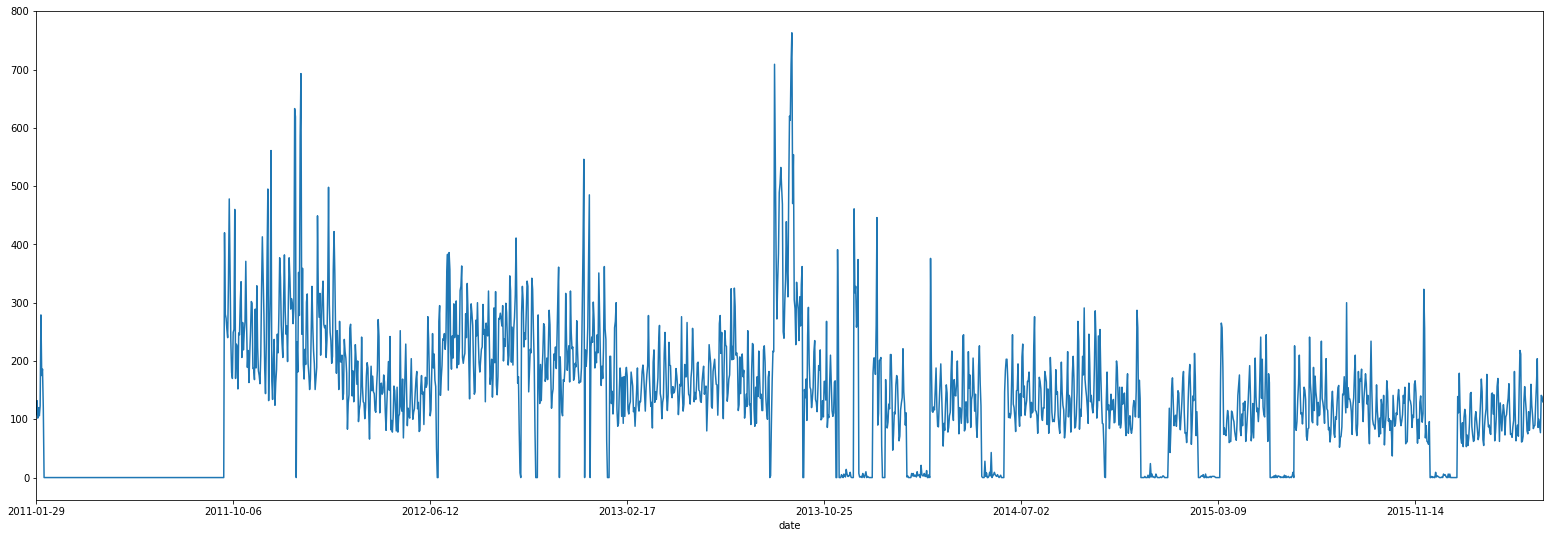

In [71]:
df['FOODS_3_090_CA_3_validation'].plot()
plt.show()

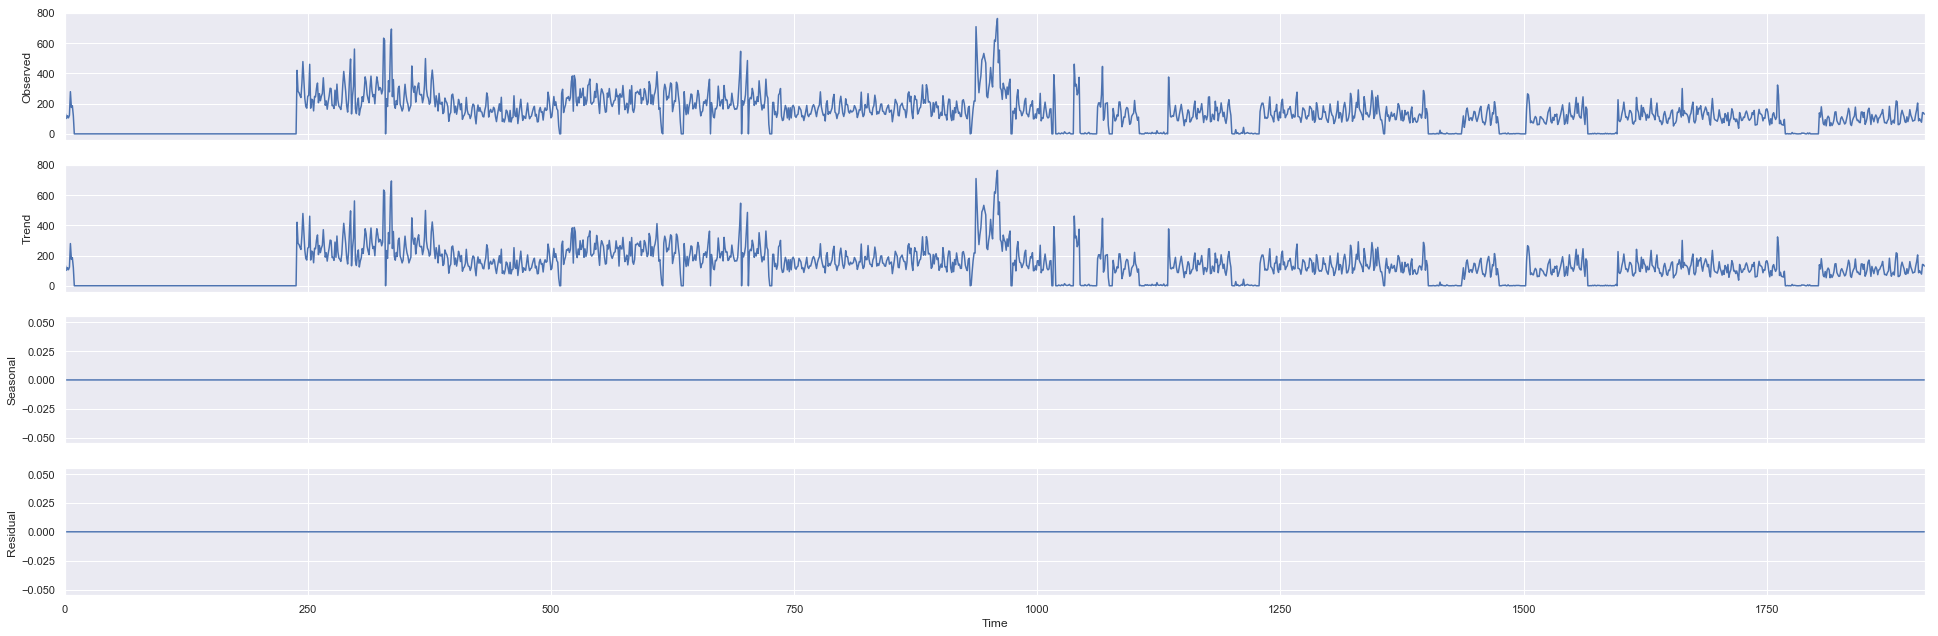

In [88]:
series = df['FOODS_3_090_CA_3_validation'].tolist()
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

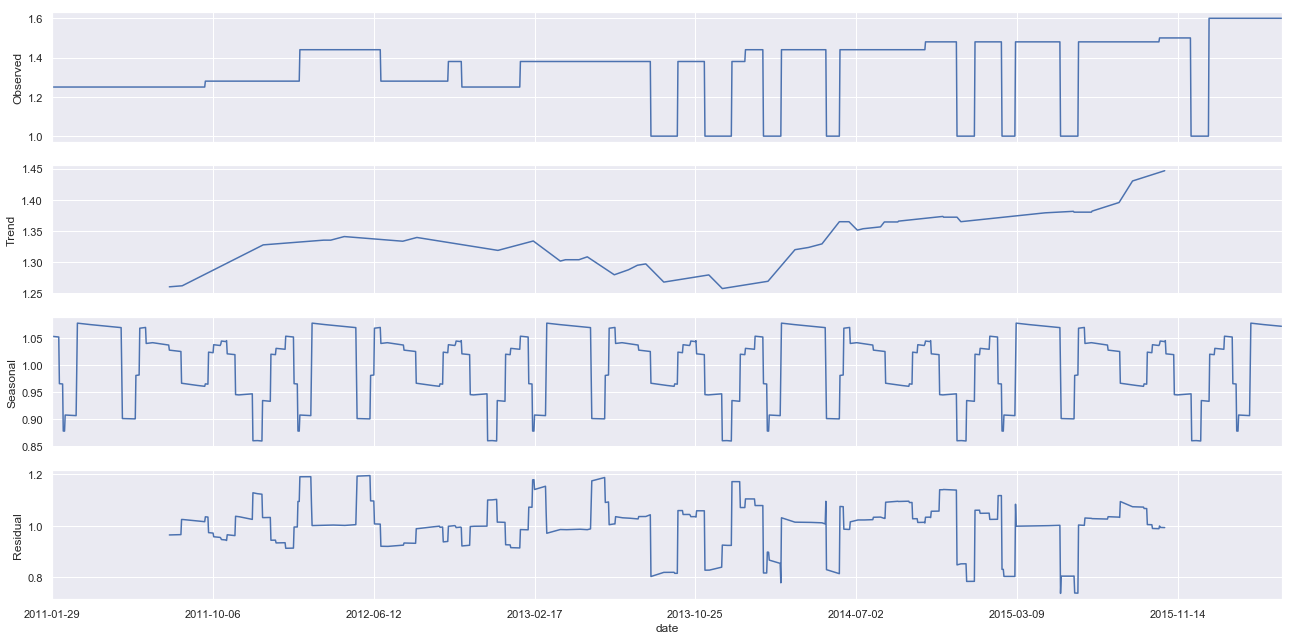

In [127]:
plt.rcParams["figure.figsize"]=18,9

result = seasonal_decompose(df['FOODS_3_090_CA_3'], model='multiplicative',freq=365)
result.plot()
pyplot.show()

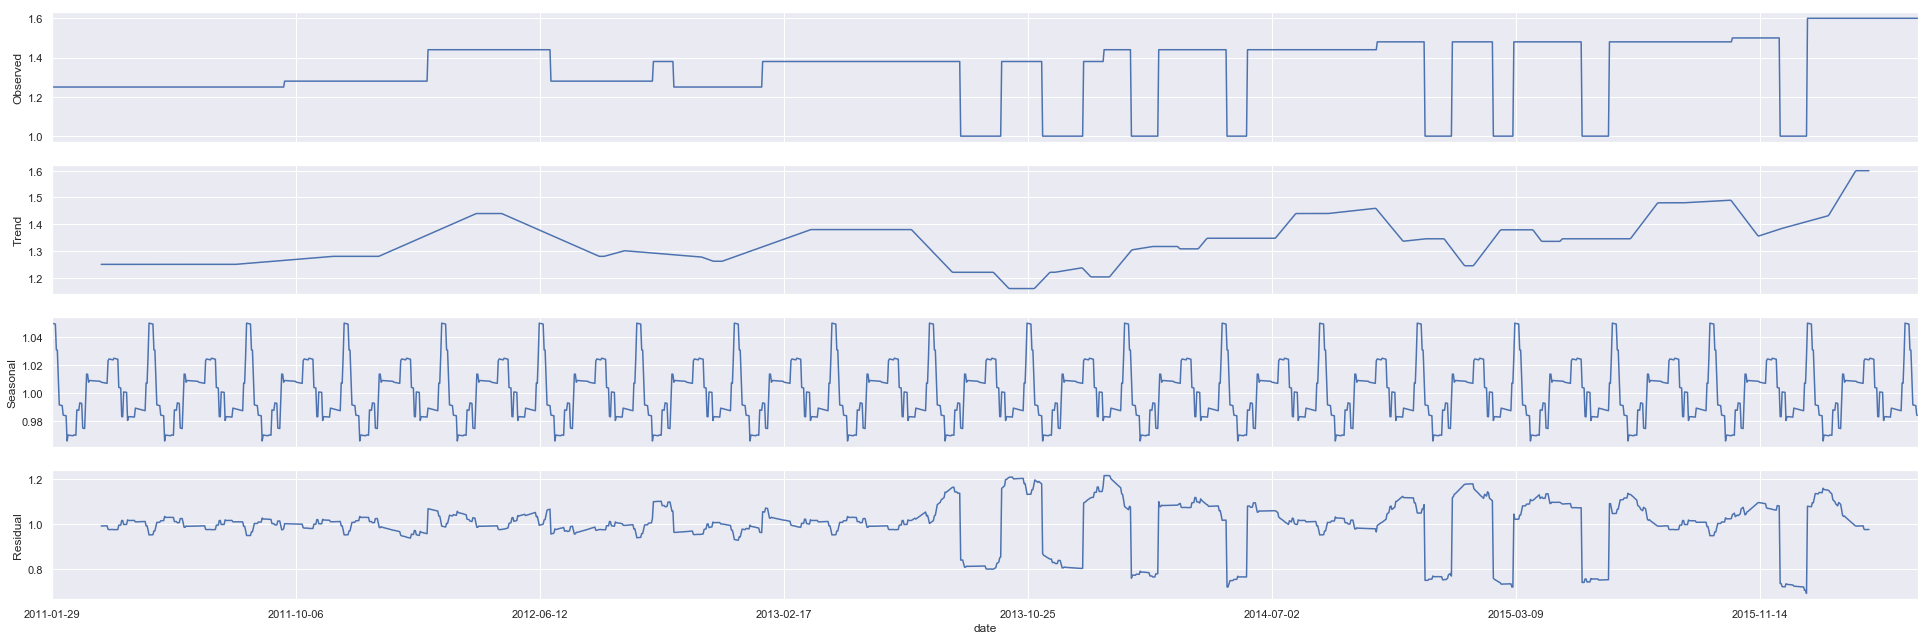

In [126]:
plt.rcParams["figure.figsize"]=27,9

result = seasonal_decompose(df['FOODS_3_090_CA_3'], model='multiplicative',freq=100)
result.plot()
pyplot.show()

In [131]:
#statistical method
from pylab import rcParams
import statsmodels.api as sm

import warnings
import itertools
import matplotlib
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

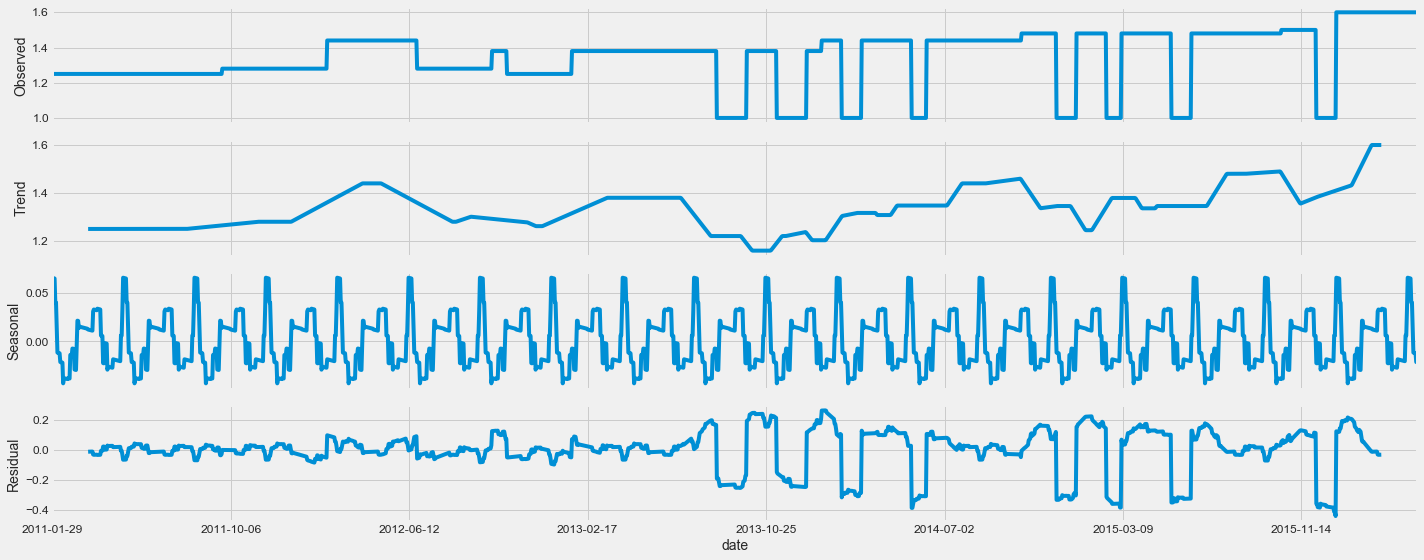

In [133]:
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(df['FOODS_3_090_CA_3'], model='additive',freq=100)
fig = decomposition.plot()
plt.show()

In [73]:
df.head()

,year,wm_yr_wk,weekday,wday,snap_WI,snap_TX,snap_CA,month,index,event_type_2,...,FOODS_1_001_TX_1_validation,FOODS_1_001_TX_1,FOODS_1_001_CA_4_validation,FOODS_1_001_CA_4,FOODS_1_001_CA_3_validation,FOODS_1_001_CA_3,FOODS_1_001_CA_2_validation,FOODS_1_001_CA_2,FOODS_1_001_CA_1_validation,FOODS_1_001_CA_1
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,2011,11101,Saturday,1,0,0,0,1,d_1,NormalDay,...,0,2.0,0,2.0,1,2.0,2,2.0,3,2.0
2011-01-30,2011,11101,Sunday,2,0,0,0,1,d_2,NormalDay,...,1,2.0,1,2.0,2,2.0,0,2.0,0,2.0
2011-01-31,2011,11101,Monday,3,0,0,0,1,d_3,NormalDay,...,1,2.0,1,2.0,1,2.0,0,2.0,0,2.0
2011-02-01,2011,11101,Tuesday,4,0,1,1,2,d_4,NormalDay,...,0,2.0,1,2.0,1,2.0,0,2.0,1,2.0
2011-02-02,2011,11101,Wednesday,5,1,0,1,2,d_5,NormalDay,...,0,2.0,1,2.0,1,2.0,1,2.0,4,2.0


In [74]:
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(20,15))
sns.set(font_scale = 1)


<Figure size 1440x1080 with 0 Axes>

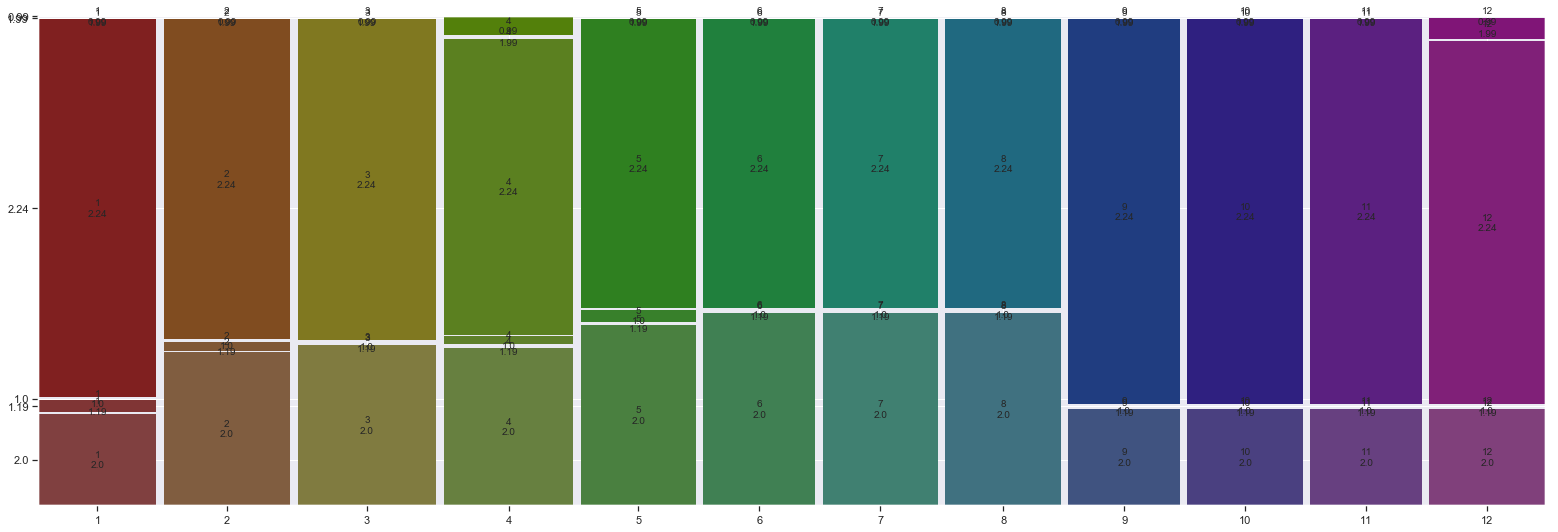

In [75]:
mosaic(df, ['month','FOODS_1_001_TX_1'])
plt.show()

## 02.01. Sell price change of items in diff state : FOODS_1_001_WI_1

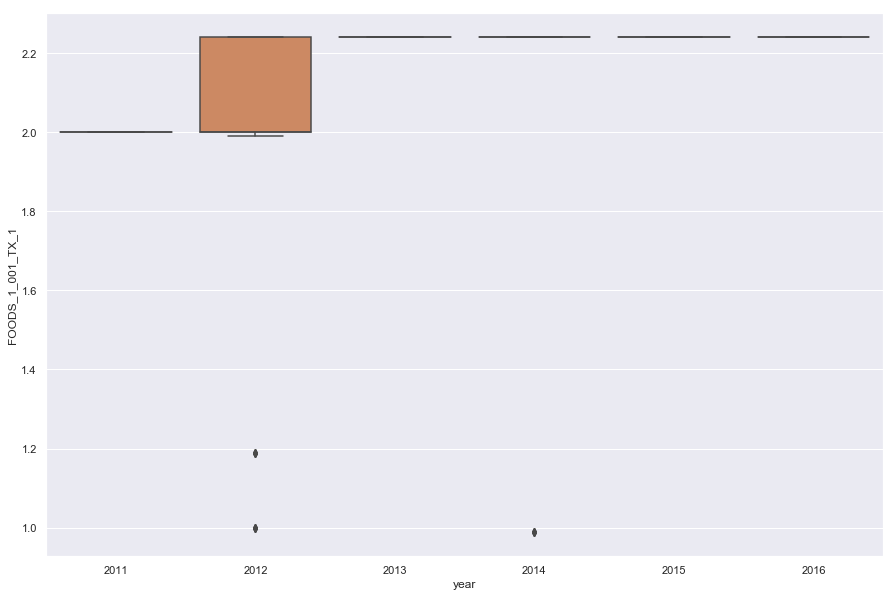

In [54]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="year", y="FOODS_1_001_TX_1", data=df1)

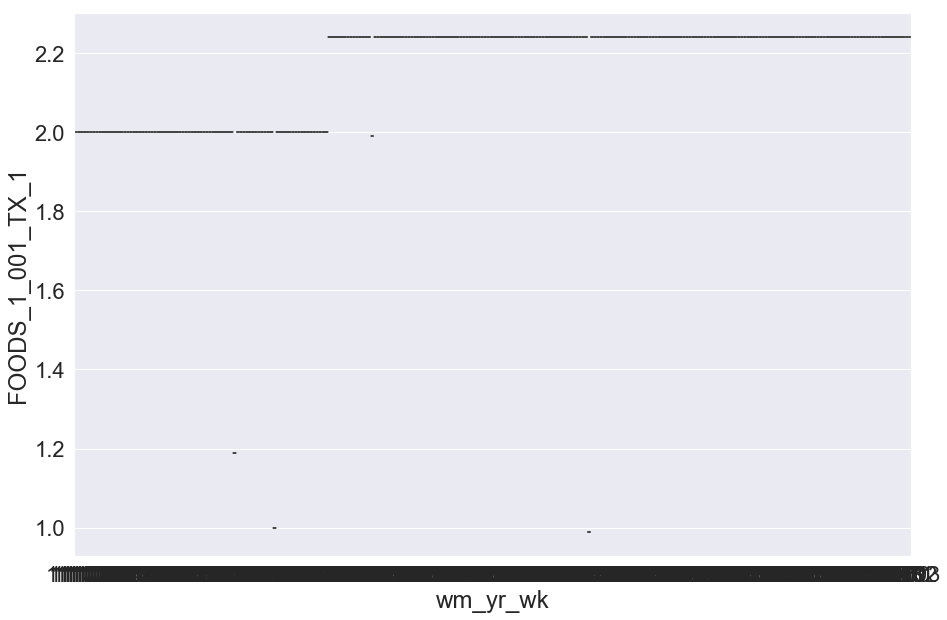

In [55]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax = sns.boxplot(x="wm_yr_wk", y="FOODS_1_001_TX_1", data=df1)

In [56]:
#remove outlier from price 
df1_r = df1[df1['FOODS_1_001_TX_1'].between(1.5, 2.5, inclusive=True)]

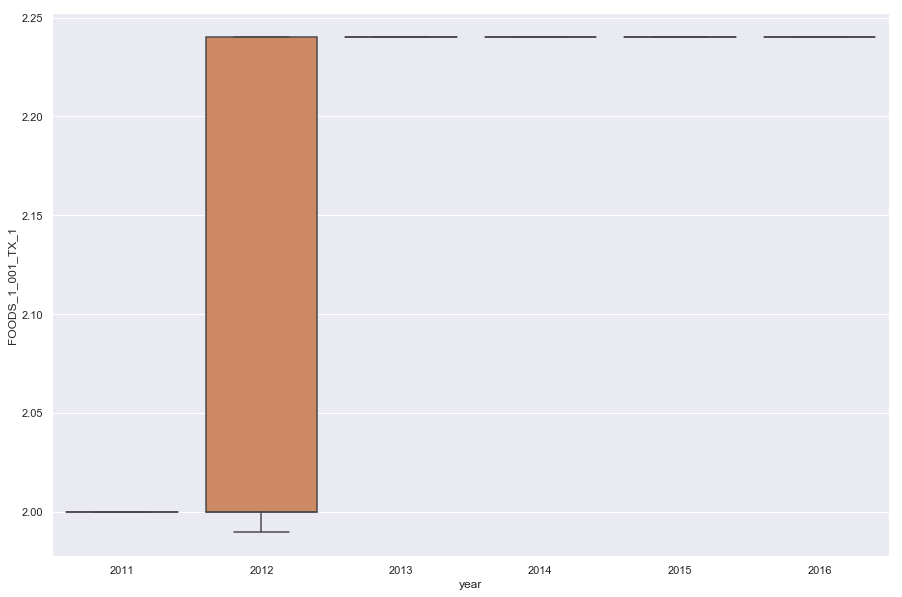

In [57]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="year", y="FOODS_1_001_TX_1", data=df1_r)

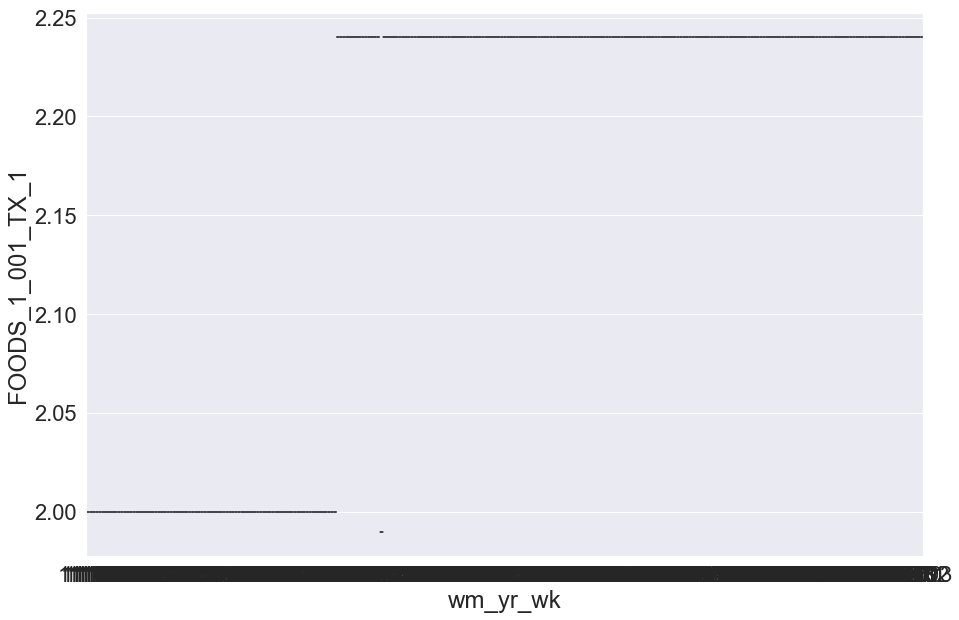

In [58]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax = sns.boxplot(x="wm_yr_wk", y="FOODS_1_001_TX_1", data=df1_r)

In [59]:
#Ok there is price increase after 2012, what about other item and state

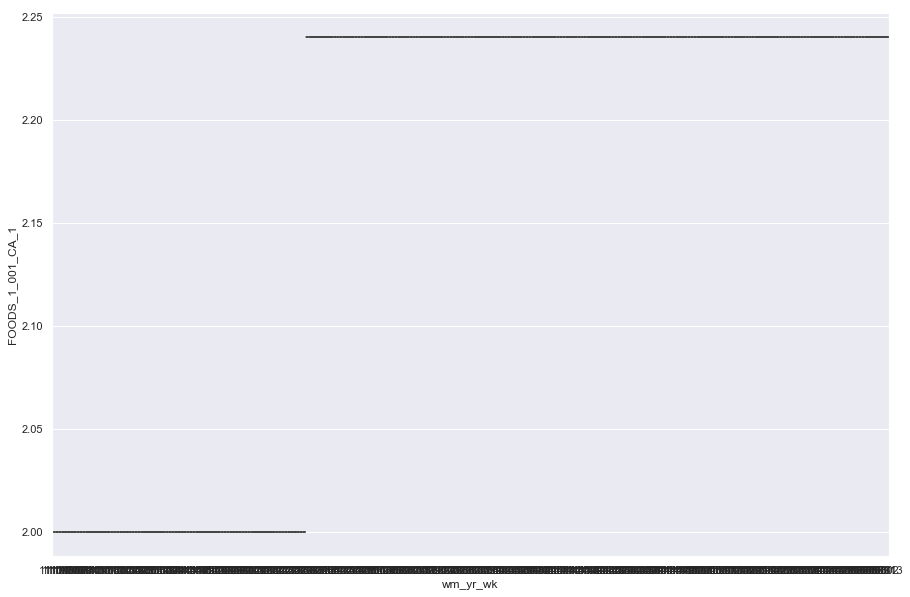

In [64]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="wm_yr_wk", y="FOODS_1_001_CA_1", data=df1)

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="year", y="FOODS_1_001_CA_1", data=df1)

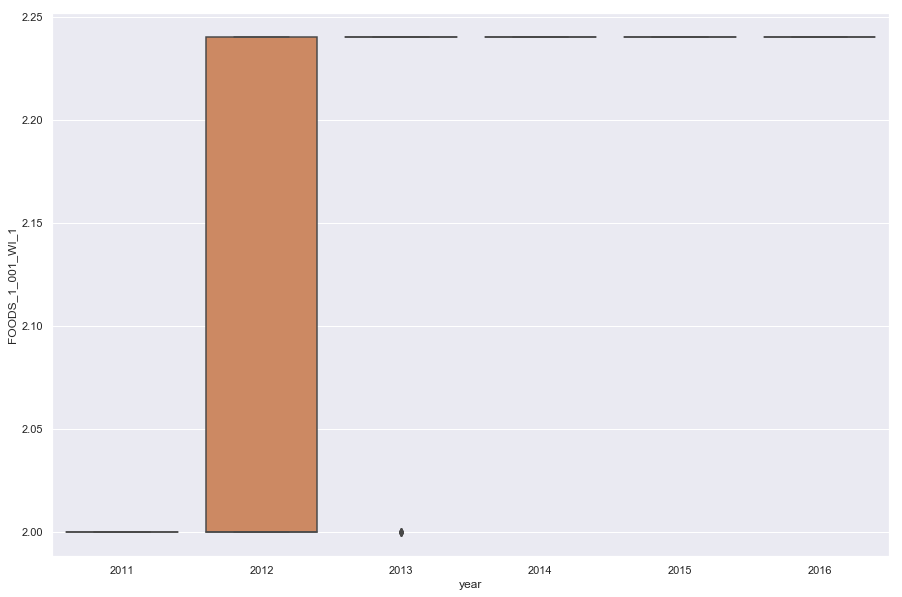

In [63]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="year", y="FOODS_1_001_WI_1", data=df1)

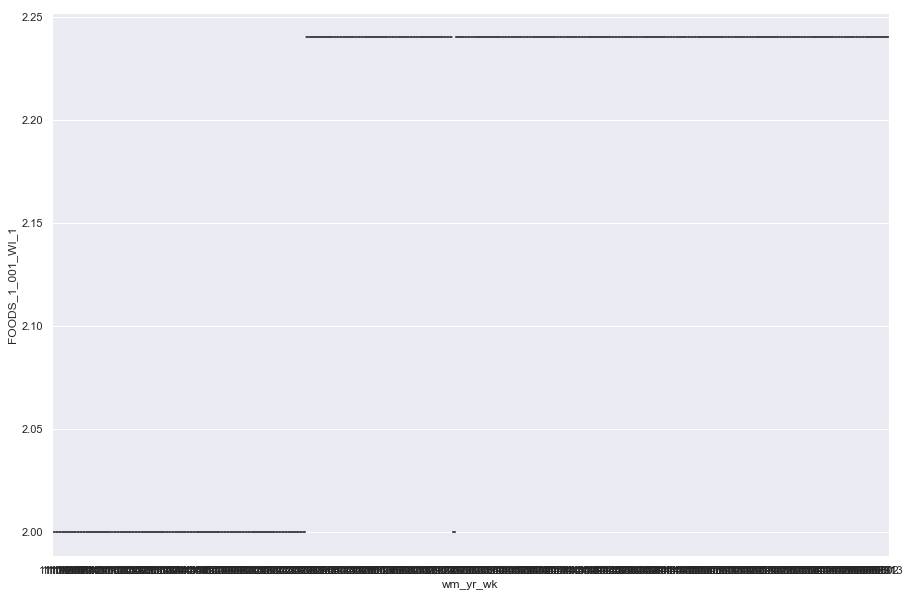

In [65]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="wm_yr_wk", y="FOODS_1_001_WI_1", data=df1)

## 02.02. Sell price change of items in diff state : HOUSEHOLD_2_516_WI_1

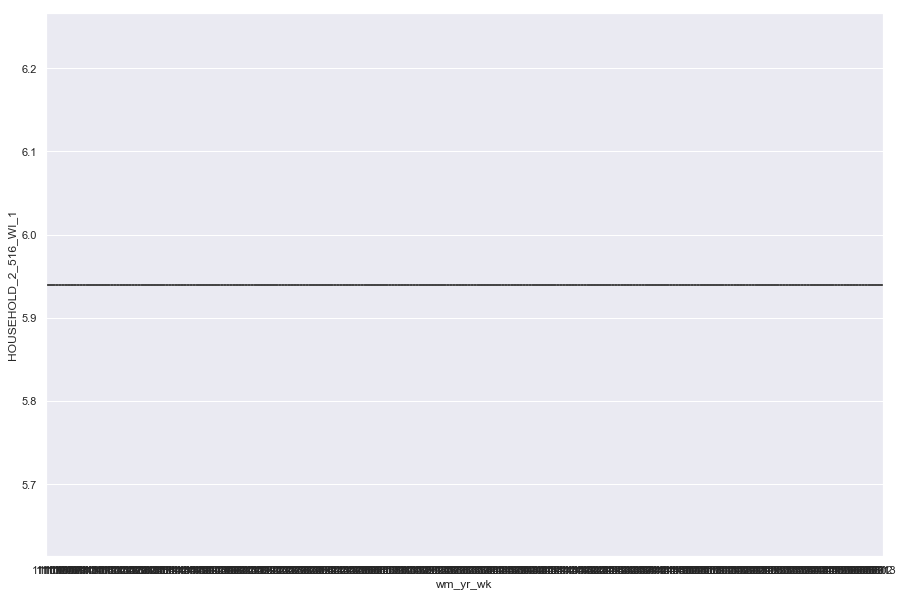

In [66]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
ax = sns.boxplot(x="wm_yr_wk", y="HOUSEHOLD_2_516_WI_1", data=df1)

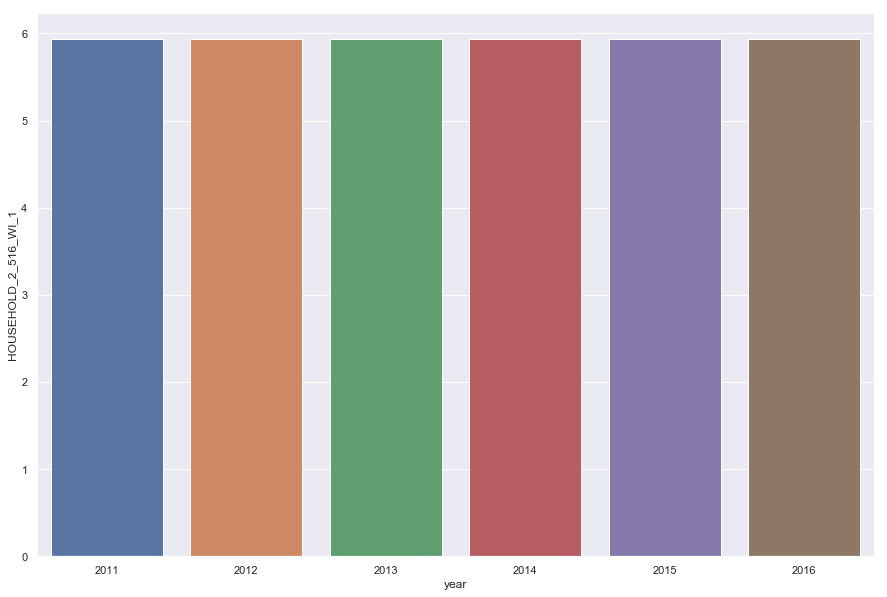

In [69]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1.year,y=df1.HOUSEHOLD_2_516_WI_1,data=df1)

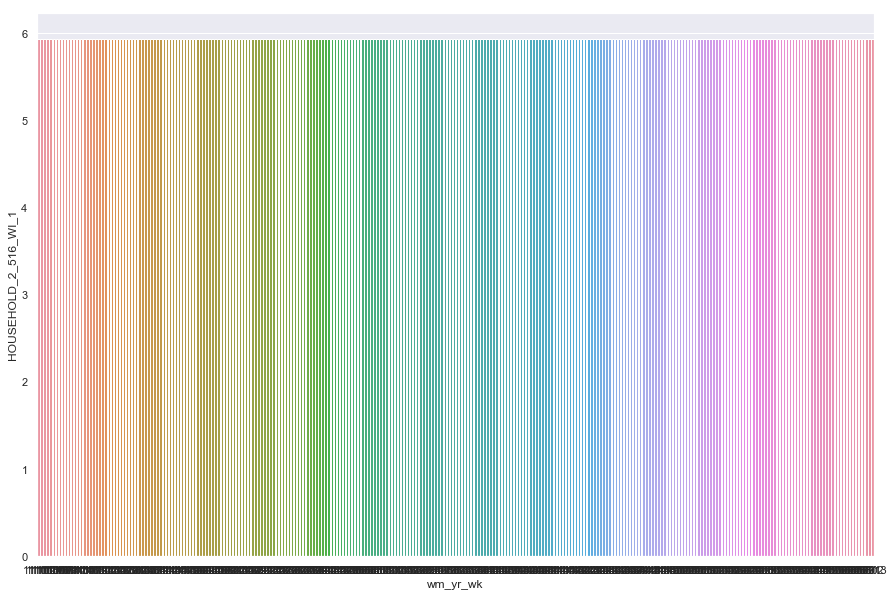

In [71]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1.wm_yr_wk,y=df1.HOUSEHOLD_2_516_WI_1,data=df1)

# 03. Forecast

In [69]:
df=df.set_index('date')
df.head()

,year,wm_yr_wk,weekday,wday,snap_WI,snap_TX,snap_CA,month,index,event_type_2,...,FOODS_1_001_TX_1_validation,FOODS_1_001_TX_1,FOODS_1_001_CA_4_validation,FOODS_1_001_CA_4,FOODS_1_001_CA_3_validation,FOODS_1_001_CA_3,FOODS_1_001_CA_2_validation,FOODS_1_001_CA_2,FOODS_1_001_CA_1_validation,FOODS_1_001_CA_1
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,2011,11101,Saturday,1,0,0,0,1,d_1,NormalDay,...,0,2.0,0,2.0,1,2.0,2,2.0,3,2.0
2011-01-30,2011,11101,Sunday,2,0,0,0,1,d_2,NormalDay,...,1,2.0,1,2.0,2,2.0,0,2.0,0,2.0
2011-01-31,2011,11101,Monday,3,0,0,0,1,d_3,NormalDay,...,1,2.0,1,2.0,1,2.0,0,2.0,0,2.0
2011-02-01,2011,11101,Tuesday,4,0,1,1,2,d_4,NormalDay,...,0,2.0,1,2.0,1,2.0,0,2.0,1,2.0
2011-02-02,2011,11101,Wednesday,5,1,0,1,2,d_5,NormalDay,...,0,2.0,1,2.0,1,2.0,1,2.0,4,2.0


In [134]:
#Choose best best_order, best_seasonal_order based on model aic

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_order = None
best_mdl = None
best_seasonal_order=None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['FOODS_3_090_CA_3'],order=param, seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            tmp_aic = results.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order=param
                best_seasonal_order=param_seasonal
                
        except:
            continue

print(f'ARIMA{best_order}x{best_order}12 - AIC:{best_aic}')

ARIMA(1, 0, 0)x(1, 0, 0)12 - AIC:-6651.61061162913


In [163]:
#Arima model
mod = sm.tsa.statespace.SARIMAX(df['FOODS_3_090_CA_3'],order=(1, 0, 0),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False).fit()

In [164]:
pred

In [165]:
pred_ci

,lower FOODS_3_090_CA_3,upper FOODS_3_090_CA_3
2016-01-01,0.920050,1.087696
2016-01-02,0.916184,1.083830
2016-01-03,1.518367,1.686014
2016-01-04,1.521245,1.688888
2016-01-05,1.513488,1.681131
2016-01-06,1.512934,1.680577
2016-01-07,1.513878,1.681521
2016-01-08,1.516175,1.683817
2016-01-09,1.519283,1.686926
2016-01-10,1.509840,1.677482


In [166]:
pred.predicted_mean

2016-01-01    1.003873
2016-01-02    1.000007
2016-01-03    1.602191
2016-01-04    1.605067
2016-01-05    1.597309
2016-01-06    1.596755
2016-01-07    1.597699
2016-01-08    1.599996
2016-01-09    1.603105
2016-01-10    1.593661
2016-01-11    1.597626
2016-01-12    1.599996
2016-01-13    1.603847
2016-01-14    1.600655
2016-01-15    1.603241
2016-01-16    1.605034
2016-01-17    1.597327
2016-01-18    1.596777
2016-01-19    1.597715
2016-01-20    1.599996
2016-01-21    1.603084
2016-01-22    1.593703
2016-01-23    1.597642
2016-01-24    1.599996
2016-01-25    1.603822
2016-01-26    1.604030
2016-01-27    1.603226
2016-01-28    1.605000
2016-01-29    1.597345
2016-01-30    1.596798
                ...   
2016-03-26    1.603900
2016-03-27    1.603122
2016-03-28    1.604840
2016-03-29    1.597430
2016-03-30    1.596901
2016-03-31    1.597803
2016-04-01    1.599996
2016-04-02    1.602965
2016-04-03    1.593946
2016-04-04    1.597733
2016-04-05    1.599996
2016-04-06    1.603675
2016-04-07 

In [167]:
df['FOODS_3_090_CA_3']['2016-01-01':]

date
2016-01-01    1.0
2016-01-02    1.6
2016-01-03    1.6
2016-01-04    1.6
2016-01-05    1.6
2016-01-06    1.6
2016-01-07    1.6
2016-01-08    1.6
2016-01-09    1.6
2016-01-10    1.6
2016-01-11    1.6
2016-01-12    1.6
2016-01-13    1.6
2016-01-14    1.6
2016-01-15    1.6
2016-01-16    1.6
2016-01-17    1.6
2016-01-18    1.6
2016-01-19    1.6
2016-01-20    1.6
2016-01-21    1.6
2016-01-22    1.6
2016-01-23    1.6
2016-01-24    1.6
2016-01-25    1.6
2016-01-26    1.6
2016-01-27    1.6
2016-01-28    1.6
2016-01-29    1.6
2016-01-30    1.6
             ... 
2016-03-26    1.6
2016-03-27    1.6
2016-03-28    1.6
2016-03-29    1.6
2016-03-30    1.6
2016-03-31    1.6
2016-04-01    1.6
2016-04-02    1.6
2016-04-03    1.6
2016-04-04    1.6
2016-04-05    1.6
2016-04-06    1.6
2016-04-07    1.6
2016-04-08    1.6
2016-04-09    1.6
2016-04-10    1.6
2016-04-11    1.6
2016-04-12    1.6
2016-04-13    1.6
2016-04-14    1.6
2016-04-15    1.6
2016-04-16    1.6
2016-04-17    1.6
2016-04-18    1.6
2016-

In [168]:
((pred.predicted_mean - df['FOODS_3_090_CA_3']['2016-01-01':]) ** 2).mean()

0.0031416176982455054

In [169]:
df['FOODS_3_090_CA_3'][:'2016-01-01']

date
2011-01-29    1.25
2011-01-30    1.25
2011-01-31    1.25
2011-02-01    1.25
2011-02-02    1.25
2011-02-03    1.25
2011-02-04    1.25
2011-02-05    1.25
2011-02-06    1.25
2011-02-07    1.25
2011-02-08    1.25
2011-02-09    1.25
2011-02-10    1.25
2011-02-11    1.25
2011-02-12    1.25
2011-02-13    1.25
2011-02-14    1.25
2011-02-15    1.25
2011-02-16    1.25
2011-02-17    1.25
2011-02-18    1.25
2011-02-19    1.25
2011-02-20    1.25
2011-02-21    1.25
2011-02-22    1.25
2011-02-23    1.25
2011-02-24    1.25
2011-02-25    1.25
2011-02-26    1.25
2011-02-27    1.25
              ... 
2015-12-03    1.50
2015-12-04    1.50
2015-12-05    1.00
2015-12-06    1.00
2015-12-07    1.00
2015-12-08    1.00
2015-12-09    1.00
2015-12-10    1.00
2015-12-11    1.00
2015-12-12    1.00
2015-12-13    1.00
2015-12-14    1.00
2015-12-15    1.00
2015-12-16    1.00
2015-12-17    1.00
2015-12-18    1.00
2015-12-19    1.00
2015-12-20    1.00
2015-12-21    1.00
2015-12-22    1.00
2015-12-23    1.00
2015-12

In [170]:
#Arima model
mod = sm.tsa.statespace.SARIMAX(df['FOODS_3_090_CA_3'][:'2016-01-01'],order=(1, 0, 0),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False).fit()

In [171]:
pred
pred_ci

,lower FOODS_3_090_CA_3,upper FOODS_3_090_CA_3
2016-01-01,0.920050,1.087696
2016-01-02,0.916184,1.083830
2016-01-03,1.518367,1.686014
2016-01-04,1.521245,1.688888
2016-01-05,1.513488,1.681131
2016-01-06,1.512934,1.680577
2016-01-07,1.513878,1.681521
2016-01-08,1.516175,1.683817
2016-01-09,1.519283,1.686926
2016-01-10,1.509840,1.677482


In [172]:
pred.predicted_mean

2016-01-01    1.003873
2016-01-02    1.000007
2016-01-03    1.602191
2016-01-04    1.605067
2016-01-05    1.597309
2016-01-06    1.596755
2016-01-07    1.597699
2016-01-08    1.599996
2016-01-09    1.603105
2016-01-10    1.593661
2016-01-11    1.597626
2016-01-12    1.599996
2016-01-13    1.603847
2016-01-14    1.600655
2016-01-15    1.603241
2016-01-16    1.605034
2016-01-17    1.597327
2016-01-18    1.596777
2016-01-19    1.597715
2016-01-20    1.599996
2016-01-21    1.603084
2016-01-22    1.593703
2016-01-23    1.597642
2016-01-24    1.599996
2016-01-25    1.603822
2016-01-26    1.604030
2016-01-27    1.603226
2016-01-28    1.605000
2016-01-29    1.597345
2016-01-30    1.596798
                ...   
2016-03-26    1.603900
2016-03-27    1.603122
2016-03-28    1.604840
2016-03-29    1.597430
2016-03-30    1.596901
2016-03-31    1.597803
2016-04-01    1.599996
2016-04-02    1.602965
2016-04-03    1.593946
2016-04-04    1.597733
2016-04-05    1.599996
2016-04-06    1.603675
2016-04-07 

In [173]:
((pred.predicted_mean - df['FOODS_3_090_CA_3']['2016-01-01':]) ** 2).mean()

0.0031416176982455054